# SciPy Library!

Practice from Mr. P Solver's SciPy tutorial on YouTube.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Curve Fitting

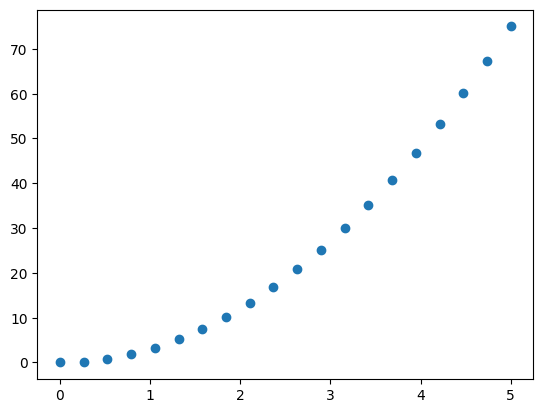

In [2]:
from scipy.optimize import curve_fit

x = np.linspace(0, 5, 20)
y1 = 3*x**2
plt.plot(x, y1, 'o')
plt.show()

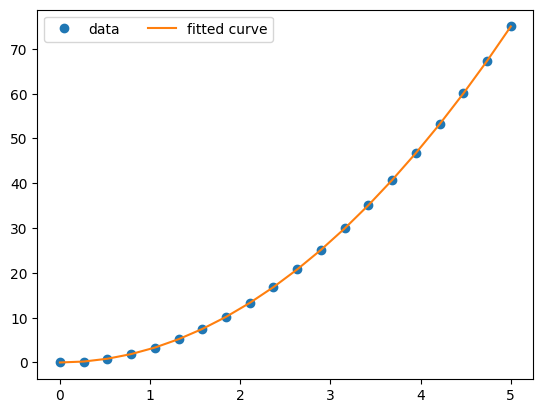

In [ ]:
def func(x, a, b):
    return a*x**2 + b

popt, pcov = curve_fit(func, x, y1, p0 = (3, 0)) # p0 represents initial guesses.
# curve_fit returns 2 arrays: popt and pcov. popt represents the best-fit parameters while pcov represents the estimated error on the parameters.

a, b = popt # Each element in the popt array corresponds to the variable. popt[0] corresponds with a in this example.

t = np.linspace(0, 5, 20)
y2 = func(x, a, b)
plt.plot(t, y1, 'o', label = 'data')
plt.plot(t, y2, label = 'fitted curve')
plt.legend(loc = 'upper left', ncol = 2)
plt.show()

In [12]:
popt

array([3., 0.])

In [11]:
np.sqrt(np.diag(pcov))

array([0., 0.])

# Optimization

In [13]:
from scipy.optimize import minimize

def f(x):
    return x**2 - 4*x + 4

res = minimize(f, 2) # 2 is the initial guess.
round(float(res.x[0]), 0) # Object res contains lots of information. 
# x is an array that has information about the minimum so do .x[0] as shown. Then, convert it to a float or else you'll get an np.float64 array.

2.0

Minimize $f(x, y) = (x - 1)^2 + (y - 2.5)^2$ subject to 
- $x - 2y + 2 \ge 0$
- $-x - 2y + 6 \ge 0$
- $-x + 2y + 2 \ge 0$
- $x \ge 0$
- $y \ge 0$

In [14]:
f = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2 # x will be a vector with x and y as its elements.
cns = ({'type': 'ineq', 'fun': lambda x: x[0] - 2*x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2*x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2*x[1] + 2})
# Constraints must be a sequence of dictionaries. Each one has the fields: type (eq or ineq), fun for function defining the constraint, and more.

bnds = ((0, None), (0, None)) # Bounds of x and y. "Sequence of (min, max) pairs for each element in x. None is used to specify no bound." 

res = minimize(f, (2, 3), bounds = bnds, constraints = cns) # Tuple (2, 3) is your initial guess. 
print(f'({round(float(res.x[0]), 2)}, {round(float(res.x[1]), 2)})')

(1.4, 1.7)


# Interpolation

Interpolation estimates the value of a function between points.

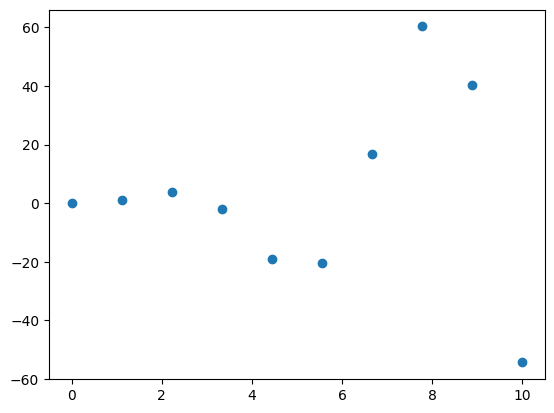

In [76]:
x = np.linspace(0, 10, 10)
y = x**2 * np.sin(x)
plt.scatter(x, y)
plt.show()

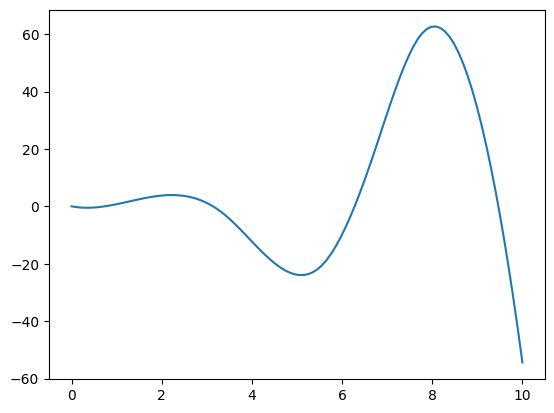

In [ ]:
from scipy.interpolate import interp1d

f = interp1d(x, y, kind = 'cubic') # cubic is a smooth kind of curve for interpolation.
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)

plt.plot(x_dense, y_dense)

# Integration

Evaluate this definite integral: $$\int_{0}^{1}x^2\sin(x)e^{-x}dx$$

In [ ]:
from scipy.integrate import quad

f = lambda x: x**2 * np.sin(x) * np.exp(-x)
integral, error = quad(f, 0, 1)
integral

0.10246777930717413

Evaluate this double integral: $$\int_{0}^{1}\int_{-x}^{x^2} \sin(x + y^2) dydx$$

In [ ]:
from scipy.integrate import dblquad

integrand = lambda y, x: np.sin(x + y**2)
lwr_y = lambda x: -x
upr_y = lambda x: x**2
integral, error = dblquad(integrand, 0, 1, lwr_y, upr_y) # Outer bounds of 0 and 1 go first in dblquad().
integral

0.590090324408853

# Differential Equations

Air Friction while falling: $v^{'}-\alpha v^2 + \beta = 0 \quad v(0)=0$

If $\alpha = 4$ and $\beta = 5$:

C:\Users\wei22\AppData\Local\Temp\ipykernel_1124\1330440743.py:8: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol = odeint(dvdt, v0, t)


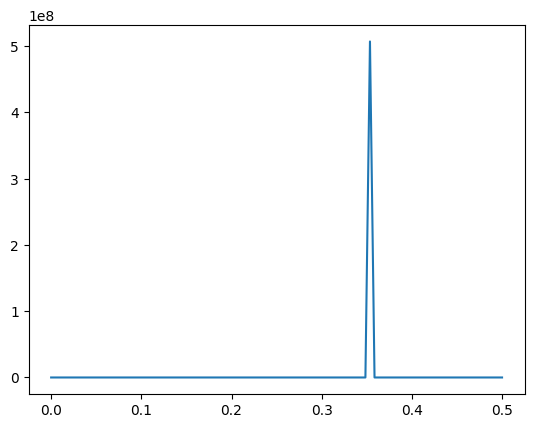

In [70]:
from scipy.integrate import odeint

def dvdt(v, t):
    return 4*v**2 + 5
v0 = 0

t = np.linspace(0, 0.5, 100) # Small interval must be used since odeint() gets overwhelmed due to the rapidly increasing dvdt.
sol = odeint(dvdt, v0, t)
plt.plot(t, sol.T[0])
plt.show()

# Fourier Transform

Formula: $$F(\omega) = \int_{-\infty}^{\infty}f(t)e^{-2\pi ift}dt$$

The operation tells us the frequencies that make up a time series or a wave signal.

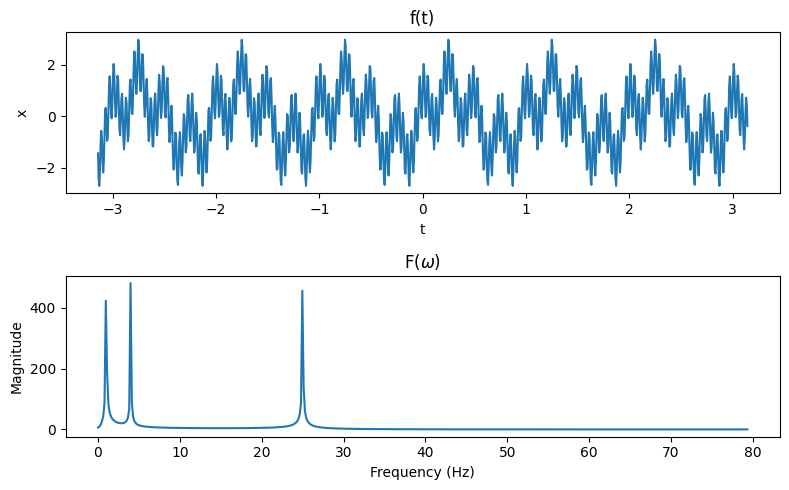

In [65]:
from scipy.fft import fft, fftfreq

t = np.linspace(-np.pi, np.pi, 1000)
x = np.sin(2*np.pi*t) + np.cos(8*np.pi*t) + np.sin(50*np.pi*t)
N = len(x)
y = fft(x)[:N//2] # x is an array. The [:N//2] removes the negative frequencies, takes one half. Returns an array.
f = fftfreq(N, np.diff(t)[0])[:N//2] # fftfreq(n, d) where n is basically the sample size and d is the sample spacing which np.diff does.

fig, axes = plt.subplots(2, 1, figsize = (8, 5))
ax = axes[0]
ax.plot(t, x)
ax.set_title('f(t)')
ax.set_xlabel('t')
ax.set_ylabel('x')

ax = axes[1]
ax.plot(f, np.abs(y))
ax.set_title(r'F($\omega$)')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude')

plt.tight_layout()
plt.show()